## Ridge regression

In [1]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

#### Declare some visual functions

In [2]:
def plot_actual_vs_predicted(X_validation, y_actual, y_pred, feature, xlabel, ylabel):
    """
    Draw a scatter plot comparing actual and predicted values for a specific feature.

    Parameters:
    X_validation (pd.DataFrame): Input data containing the feature to be plotted.
    y_actual (array-like): Actual value.
    y_pred (array-like): Predicted value.
    feature (str): Column name in X_validation to compare.
    xlabel (str): Label for the X-axis (name of the feature displayed on the chart).
    ylabel (str): Label for the Y-axis (e.g. Price, Area, ...).
    """
    plt.figure(figsize=(12, 6))
    plt.scatter(X_validation[feature], y_actual, c='r', marker='o', label="Actual values", alpha=0.5) 
    plt.scatter(X_validation[feature], y_pred, c='b', marker='s', label="Predicted values", alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(f"Scatter Plot of Actual vs Predicted {ylabel} per {xlabel}")
    plt.show()

#### Select feature

##### Read data

- Training set

In [3]:
df = pd.read_csv("TransformedData.csv")
df.head()

,Longitude,Latitude,Area (m²),Width (m),Length (m),Land Type,Legal Status,House Direction,Price,Ward Name_Phường An Hải Bắc,...,Street Name_đường 7m5 - Khu E Kim Long,Street Name_đường golden Hills,Street Name_đường khue đông,Street Name_đường số 5,1 Part Residential,All Residential,Back Expansion,Car Alley,Frontage,No Residential
0,10.400457,4.008204,10.000000,2.000000,0.736588,4,6,5.0,150000000,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0,0,1
1,10.399917,4.006730,10.099505,2.236068,0.407946,4,6,8.0,165000000,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
2,10.399553,4.007356,12.247449,3.162278,-0.906622,4,6,6.0,250000000,0.0,...,0.0,0.0,0.0,0.0,1,0,1,0,0,1
3,10.400602,4.003590,10.000000,2.236068,-0.085017,4,5,6.0,250000000,0.0,...,0.0,0.0,0.0,0.0,1,0,1,0,0,1
4,10.398891,4.009621,10.000000,2.236068,-0.085017,4,5,4.0,250000000,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0,0,1


##### Input variables

- Training set

In [4]:
x = df.drop(columns=["Price", "Legal Status"])
x.head()

,Longitude,Latitude,Area (m²),Width (m),Length (m),Land Type,House Direction,Ward Name_Phường An Hải Bắc,Ward Name_Phường An Hải Tây,Ward Name_Phường An Hải Đông,...,Street Name_đường 7m5 - Khu E Kim Long,Street Name_đường golden Hills,Street Name_đường khue đông,Street Name_đường số 5,1 Part Residential,All Residential,Back Expansion,Car Alley,Frontage,No Residential
0,10.400457,4.008204,10.000000,2.000000,0.736588,4,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0,0,1
1,10.399917,4.006730,10.099505,2.236068,0.407946,4,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
2,10.399553,4.007356,12.247449,3.162278,-0.906622,4,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,1,0,0,1
3,10.400602,4.003590,10.000000,2.236068,-0.085017,4,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,1,0,0,1
4,10.398891,4.009621,10.000000,2.236068,-0.085017,4,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0,0,1


##### Target variables

- Training set

In [5]:
y = df[['Price']]
y.head()

,Price
0,150000000
1,165000000
2,250000000
3,250000000
4,250000000


##### Divide into 2 training sets and validation sets

 - Split data

In [6]:
X_train, X_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=554)
print(X_train.shape, X_validation.shape)
print(y_train.shape, y_validation.shape)

(2578, 1468) (645, 1468)
(2578, 1) (645, 1)


#### Select Alpha coefficient

In [7]:
alpha_range = np.arange(0.05, 1, 0.05)
models = {}

def _regression(alpha, X_train, y_train, X_validation, y_validation, models: dict):
    dict_models = {}
    rid_regr = Ridge(alpha=alpha)
    rid_regr.fit(X_train, y_train)
    y_pred = rid_regr.predict(X_validation)
    MSE = np.mean((y_validation-y_pred)**2)
    dict_models["MSE"] = MSE
    dict_models["model"] = rid_regr
    model_name = "ridge_" + str(alpha)
    models[model_name] = dict_models
    return models

for alpha in alpha_range:
  models = _regression(round(alpha, 2), X_train, y_train, X_validation, y_validation, models)

# Print out the model with the best alpha coefficient (smallest MSE)
i = 0
for k, v in models.items():
  if i==0:
    best_model = k
    mse = models[k]["MSE"]
  if models[k]["MSE"] < mse:
    best_model = k
  print("model {}, MSE: {}".format(k, models[k]["MSE"]))
  i+=1

print("-----------------------------------------")
print("Best models: {}, MSE: {}".format(best_model, models[best_model]["MSE"]))


model ridge_0.05, MSE: 3.0772645359322813e+18
model ridge_0.1, MSE: 2.9722044883032556e+18
model ridge_0.15, MSE: 2.922388294251592e+18
model ridge_0.2, MSE: 2.892610459478843e+18
model ridge_0.25, MSE: 2.8730294998114196e+18
model ridge_0.3, MSE: 2.8596247432114345e+18
model ridge_0.35, MSE: 2.850372019871074e+18
model ridge_0.4, MSE: 2.8441042138328817e+18
model ridge_0.45, MSE: 2.840081659547963e+18
model ridge_0.5, MSE: 2.8378024391622554e+18
model ridge_0.55, MSE: 2.8369082860520064e+18
model ridge_0.6, MSE: 2.837133506316318e+18
model ridge_0.65, MSE: 2.83827517628989e+18
model ridge_0.7, MSE: 2.840174699257147e+18
model ridge_0.75, MSE: 2.8427058235498245e+18
model ridge_0.8, MSE: 2.845766537391334e+18
model ridge_0.85, MSE: 2.849273397666579e+18
model ridge_0.9, MSE: 2.8531574472763177e+18
model ridge_0.95, MSE: 2.8573612045475415e+18
-----------------------------------------
Best models: ridge_0.95, MSE: 2.8573612045475415e+18


*Vậy với Alpha 0.05 sẽ cho mô hình tối ưu nhất*

#### Model training

##### 4.1 Create a Ridge Regression model object from the linear_model library and train it with input and target variables

In [8]:
ridge_regression = Ridge(alpha=0.95)
ridge_regression.fit(X_train, y_train)


Ridge(alpha=0.95)

##### Real estate price prediction

- Prediction on validation set

In [9]:
y_pred_validation = ridge_regression.predict(X_validation)
y_pred_validation

array([[ 1.39673106e+10],
       [ 2.52522252e+09],
       [ 4.17240556e+09],
       [ 4.00771739e+09],
       [ 6.06082257e+09],
       [ 6.06396943e+09],
       [ 5.99126869e+09],
       [ 3.40659907e+09],
       [ 4.39520754e+09],
       [ 4.93237632e+09],
       [ 2.48395465e+09],
       [ 3.57719853e+09],
       [ 2.12831124e+09],
       [ 7.43977837e+09],
       [ 5.95943487e+09],
       [ 6.03692992e+09],
       [ 6.22618836e+09],
       [ 1.15309309e+10],
       [ 6.13501217e+09],
       [ 1.15110881e+09],
       [ 4.08569201e+09],
       [ 4.37369112e+09],
       [ 2.27384166e+09],
       [ 5.67636648e+09],
       [ 3.77249154e+09],
       [ 1.87403888e+09],
       [ 4.07416729e+09],
       [ 8.60932495e+09],
       [ 6.04587636e+09],
       [ 1.65590239e+09],
       [ 5.10030294e+09],
       [ 6.15321434e+09],
       [ 4.96194819e+09],
       [ 6.67648999e+09],
       [ 3.05972259e+09],
       [ 9.02183299e+09],
       [ 2.40848866e+09],
       [ 1.95994315e+09],
       [ 6.2

- On the train set

In [10]:
y_pred_train = ridge_regression.predict(X_train)
y_pred_train

array([[1.48927867e+10],
       [2.34124048e+09],
       [5.96074348e+09],
       ...,
       [4.75380097e+09],
       [1.08358048e+10],
       [7.43062667e+09]])

##### Model evaluation based on MSE and R-squared

- Review on Train

In [11]:
# Calculate MSE
mse_ridge_train = mean_squared_error(y_train, y_pred_train)

# Calculate R-squared
r2_ridge_train = r2_score(y_train, y_pred_train)

# Calculate MAPE
n = len(y_train)
mape = (1/n) * np.sum((np.abs((y_pred_train - y_train) / y)) * 100, axis=0)

print("Train Set:")
print("Mean Squared Error (MSE) of Ridge Model:", mse_ridge_train)
print("R-squared of Ridge Model:", r2_ridge_train * 100)
print("MAPE of Ridge Model:", mape)

Train Set:
Mean Squared Error (MSE) of Ridge Model: 1.6789164377965563e+18
R-squared of Ridge Model: 89.37863190330113
MAPE of Ridge Model: Price    29.450783
dtype: float64


- Evaluation on the Validation set

In [12]:
# Calculate MSE
mse_ridge = mean_squared_error(y_validation, y_pred_validation)

# Calculate R-squared
r2_ridge = r2_score(y_validation, y_pred_validation)

# Calculate MAPE
n = len(y_validation)
mape = (1/n) * np.sum((np.abs((y_pred_validation - y_validation) / y)) * 100, axis=0)

print("Validation Set:")
print("Mean Squared Error (MSE) of Ridge Model:", mse_ridge)
print("R-squared of Ridge Model:", r2_ridge * 100)
print("MAPE of Ridge Model:", mape)

Validation Set:
Mean Squared Error (MSE) of Ridge Model: 2.8573612045475415e+18
R-squared of Ridge Model: 78.6754381431264
MAPE of Ridge Model: Price    156.718577
dtype: float64


#### Visualization of the *Price* characteristic difference between the initial value and the predicted value

- Training set

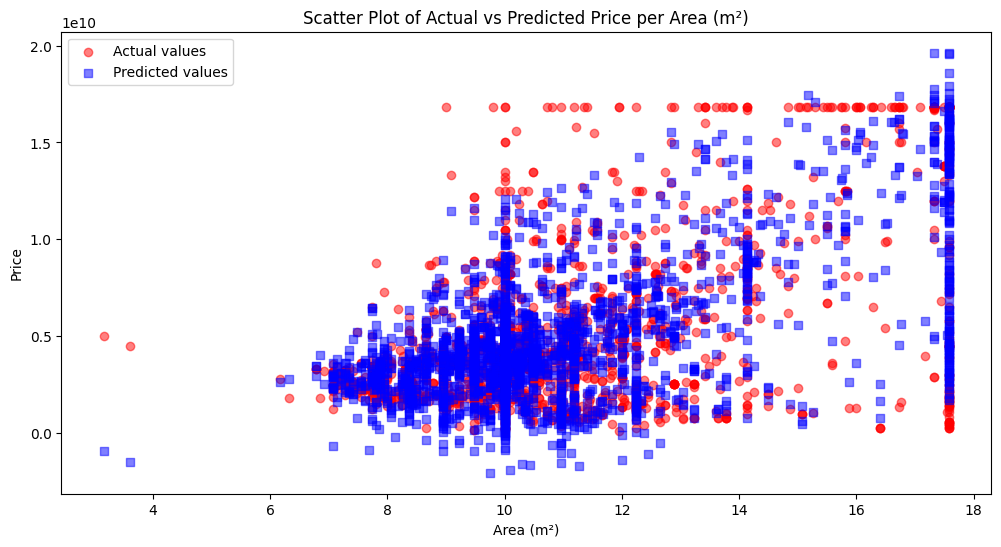

In [13]:
plot_actual_vs_predicted(X_train, y_train, y_pred_train, "Area (m²)", "Area (m²)", "Price")

- Validation set 

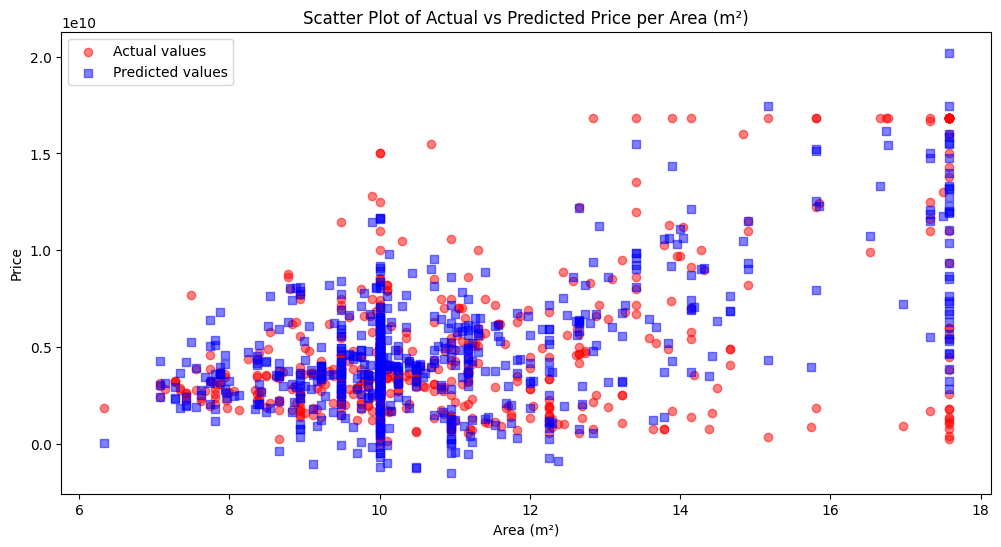

In [14]:
plot_actual_vs_predicted(X_validation, y_validation, y_pred_validation, "Area (m²)", "Area (m²)", "Price")

#### Conclusion

##### Advantages
<li>Provides a more stable solution than conventional Linear Regression by minimizing the magnitude of the coefficients, which improves accuracy and reduces the risk of overfitting</li>
<li>Maintains flexibility so that the model can adapt to new data</li>

##### Disadvantages
<li>More complex than Linear Regression</li>
<li>Not stable because changing random_state values ​​can cause model performance fluctuations</li>